In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '00787'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.5461114645004272
{'Retrieve': {'messages': [HumanMessage(content='Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', name='User')], 'session_id': '00787', 'previous_node': 'Retrieve', 'next': 'Initialize', 'plan': None, 'task': 'Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', 'code': None, 'function_detail': 'Text between the <statcast_batter_documentation></statcast_batter_documentation> tags is documentation for the statcast_batter library.  Consult this section to confirm which attributes to pass into the statcast_batter library.\n<statcast_batter_documentation>\n# Statcast Batter\n`statcast_batter(start_dt=[yesterday\'s date], end_dt=None, player_id)`\n\nThe statcast function retrieves pitch-level statcast data for a given date or range or dates. \n\n## Arguments\n`start_dt:` first day for which you want to retrieve data. Defaults to yesterday\'s 

{'Orchestrate': {'next': 'Execute'}}
----
Unknown plan. Executing with Opus

Executing:
# 1. Import the statcast_pitcher and playerid_lookup functions from pybaseball
from pybaseball import statcast_pitcher, playerid_lookup

Executing:
# 2. Look up Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny')  
duffy_mlbam_id = duffy_id['key_mlbam'][0]
print(f"Danny Duffy's MLBAM ID is: {duffy_mlbam_id}")

Result:
Gathering player lookup table. This may take a moment.
Danny Duffy's MLBAM ID is: 518633


Executing:
# 3. Get Danny Duffy's statcast pitching data for the 2018 season
duffy_2018_data = statcast_pitcher('2018-01-01', '2018-12-31', player_id=duffy_mlbam_id)

Result:
Gathering Player Data


Executing:
# 4. Filter to only pitches that resulted in strikeouts, group by game date, 
#    and calculate the cumulative sum of strikeouts
duffy_2018_so = duffy_2018_data[duffy_2018_data['events'] == 'strikeout']
so_by_game = duffy_2018_so.groupby(duffy_2018_so.game_date)['eve

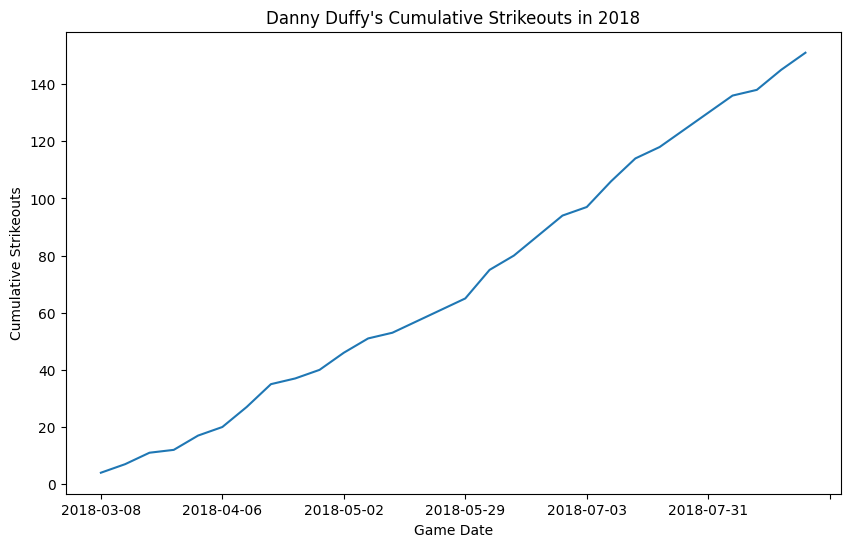


Result:
Plotted Danny Duffy's cumulative strikeouts for each game in the 2018 season.

Summarizing execution result
{'Execute': {'messages': [HumanMessage(content='Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', name='User'), AIMessage(content='Here is the updated plan to plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season:\n\n1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python \nfrom pybaseball import statcast_pitcher, playerid_lookup\n```\n\n2. Look up Danny Duffy\'s MLBAM player ID:\n\n```python\nduffy_id = playerid_lookup(\'duffy\', \'danny\') \nduffy_mlbam_id = duffy_id[\'key_mlbam\'][0]\n```\n\n3. Get Danny Duffy\'s statcast pitching data for the 2018 season:\n\n```python\nduffy_2018_data = statcast_pitcher(\'2018-01-01\', \'2018-12-31\', player_id=duffy_mlbam_id)  \n```\n\n4. Filter to only pitches that resulted in strikeouts, group by game date, and calculate the cumulative sum 

In [6]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [HumanMessage(content='Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.', name='User'), AIMessage(content='Here is the updated plan to plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season:\n\n1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python \nfrom pybaseball import statcast_pitcher, playerid_lookup\n```\n\n2. Look up Danny Duffy\'s MLBAM player ID:\n\n```python\nduffy_id = playerid_lookup(\'duffy\', \'danny\') \nduffy_mlbam_id = duffy_id[\'key_mlbam\'][0]\n```\n\n3. Get Danny Duffy\'s statcast pitching data for the 2018 season:\n\n```python\nduffy_2018_data = statcast_pitcher(\'2018-01-01\', \'2018-12-31\', player_id=duffy_mlbam_id)  \n```\n\n4. Filter to only pitches that resulted in strikeouts, group by game date, and calculate the cumulative sum of strikeouts:\n\n```python\nduffy_2018_so = duffy_2018_data[duffy_2018_d